# Tuning dos parâmetros com GridSearch

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import pickle
import numpy as np
import pandas as pd

In [2]:
with open('../data/credit.pkl', 'rb') as f:
  x_credit_train, y_credit_train, x_credit_test, y_credit_test = pickle.load(f)

In [3]:
x_credit = np.concatenate((x_credit_train, x_credit_test), axis=0)
y_credit = np.concatenate((y_credit_train, y_credit_test), axis=0)

## Árvore de Decisão

In [4]:
parameters = {'criterion': ['gini','entropy'],
              'splitter': ['best','random'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [5]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters)
grid_search.fit(x_credit, y_credit)
param = grid_search.best_params_
score = grid_search.best_score_
print(param)
print(score)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


## Random Forest

In [6]:
parameters = {'criterion': ['gini','entropy'],
              'n_estimators': [10, 40, 100, 150],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [7]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)
grid_search.fit(x_credit, y_credit)
param = grid_search.best_params_
score = grid_search.best_score_
print(param)
print(score)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
0.9875


## kNN

In [8]:
parameters = {'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [9]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters)
grid_search.fit(x_credit, y_credit)
param = grid_search.best_params_
score = grid_search.best_score_
print(param)
print(score)

{'n_neighbors': 20, 'p': 1}
0.9800000000000001


## Regressão Logistica

In [10]:
parameters = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'liblinear', 'sag', 'sag']}

In [11]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters)
grid_search.fit(x_credit, y_credit)
param = grid_search.best_params_
score = grid_search.best_score_
print(param)
print(score)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9484999999999999


## SVM

In [12]:
parameters = {'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear','poly', 'sigmoid'],
              'tol': [0.0001, 0.00001, 0.000001]}

In [13]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters)
grid_search.fit(x_credit, y_credit)
param = grid_search.best_params_
score = grid_search.best_score_
print(param)
print(score)

{'C': 1.5, 'kernel': 'rbf', 'tol': 0.0001}
0.9829999999999999


## Redes Neurais

In [14]:
parameters = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [15]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parameters)
grid_search.fit(x_credit, y_credit)
param = grid_search.best_params_
score = grid_search.best_score_

C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
print(param)
print(score)

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.9960000000000001


# Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score, KFold

from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.svm             import SVC
from sklearn.neural_network  import MLPClassifier

import pickle
import numpy as np
import pandas as pd

In [3]:
with open('../data/credit.pkl', 'rb') as f:
    x_credit_train, y_credit_train, x_credit_test, y_credit_test = pickle.load(f)

In [4]:
x_credit = np.concatenate((x_credit_train, x_credit_test), axis=0)
y_credit = np.concatenate((y_credit_train, y_credit_test), axis=0)

In [18]:
results_tree = []
results_random = []
results_knn = []
results_logis = []
results_svm = []
results_neural = []

In [19]:
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)
  
  decision = DecisionTreeClassifier(criterion='entropy', min_samples_leaf= 1, min_samples_split=5, splitter='best')
  scores = cross_val_score(decision, x_credit, y_credit, cv=kfold)
  results_tree.append(scores.mean())

  random = RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150)
  scores = cross_val_score(random, x_credit, y_credit, cv=kfold)
  results_random.append(scores.mean())

  knn = KNeighborsClassifier(n_neighbors= 20, p= 1)
  scores = cross_val_score(knn, x_credit, y_credit, cv=kfold)
  results_knn.append(scores.mean())

  logis = LogisticRegression(C= 1.0, solver= 'lbfgs', tol= 0.0001)
  scores = cross_val_score(logis, x_credit, y_credit, cv=kfold)
  results_logis.append(scores.mean())
  
  svm = SVC(C= 1.5, kernel= 'rbf', tol= 0.0001)
  scores = cross_val_score(svm, x_credit, y_credit, cv=kfold)
  results_svm.append(scores.mean())

  neural = MLPClassifier(activation= 'relu', batch_size= 56, solver= 'adam')
  scores = cross_val_score(neural, x_credit, y_credit, cv=kfold)
  results_neural.append(scores.mean())
  

C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_

C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_

In [20]:
results = pd.DataFrame({'Arvore': results_tree,
                       'Random Forest': results_random,
                       'kNN': results_knn,
                       'logistic': results_logis,
                       'SVM': results_svm,
                       'Neural': results_neural})

In [21]:
results

,Arvore,Random Forest,kNN,logistic,SVM,Neural
0,0.9865,0.9865,0.9800,0.9475,0.9835,0.9980
1,0.9845,0.9885,0.9800,0.9465,0.9835,0.9985
2,0.9905,0.9885,0.9800,0.9470,0.9835,0.9975
3,0.9880,0.9870,0.9800,0.9460,0.9845,0.9965
4,0.9885,0.9875,0.9810,0.9465,0.9855,0.9960
5,0.9890,0.9880,0.9785,0.9465,0.9830,0.9970
6,0.9885,0.9905,0.9800,0.9470,0.9840,0.9965
7,0.9875,0.9895,0.9805,0.9480,0.9845,0.9975
8,0.9860,0.9895,0.9810,0.9465,0.9820,0.9960
9,0.9870,0.9895,0.9810,0.9465,0.9830,0.9975


In [22]:
results.describe()

,Arvore,Random Forest,kNN,logistic,SVM,Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987250,0.987733,0.980200,0.946950,0.983950,0.997083
std,0.001706,0.001552,0.001270,0.000687,0.001155,0.000644
min,0.984000,0.984500,0.977500,0.945500,0.982000,0.996000
25%,0.986000,0.986625,0.979625,0.946500,0.983125,0.996500
50%,0.987250,0.987750,0.980000,0.947000,0.984000,0.997000
75%,0.988500,0.988875,0.981000,0.947500,0.984500,0.997500
max,0.990500,0.990500,0.983500,0.948500,0.987000,0.998500


In [23]:
results.var()

Arvore           2.909483e-06
Random Forest    2.409195e-06
kNN              1.613793e-06
logistic         4.715517e-07
SVM              1.333621e-06
Neural           4.152299e-07
dtype: float64

In [24]:
(results.std() / results.mean()) * 100

Arvore           0.172775
Random Forest    0.157143
kNN              0.129601
logistic         0.072517
SVM              0.117366
Neural           0.064627
dtype: float64

# Normality Test - Shapiro

Após feito o treinamento com o cross validation, verificar se há uma distribuição normal

In [25]:
from scipy.stats import shapiro
import seaborn as sns

**Alpha** = 0.05, se p > Alpha, então será uma distribuição normal

In [26]:
shapiro(results_tree), shapiro(results_random),
shapiro(results_knn), shapiro(results_logis), shapiro(results_svm), shapiro(results_neural)

(ShapiroResult(statistic=0.924409031867981, pvalue=0.03495445102453232),
 ShapiroResult(statistic=0.9370993375778198, pvalue=0.07600117474794388),
 ShapiroResult(statistic=0.9658124446868896, pvalue=0.4317886233329773),
 ShapiroResult(statistic=0.9255908727645874, pvalue=0.03754474222660065))

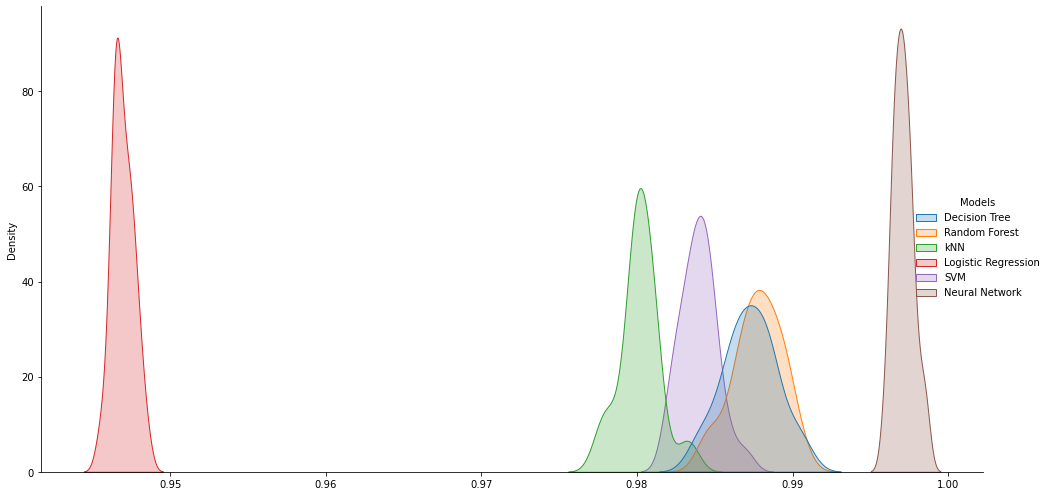

In [83]:
chart = sns.displot((results_tree, results_random, results_knn, results_logis, results_svm, results_neural),
           kind='kde', fill=True, height=7, aspect=2.0);

## Changing title
new_title = 'Models'
chart._legend.set_title(new_title)

# Replacing labels
new_labels = ['Decision Tree', 'Random Forest', 'kNN', 'Logistic Regression', 'SVM', 'Neural Network']
for t, l in zip(chart._legend.texts, new_labels):
    t.set_text(l)

# Teste de hipótese com ANOVA e Tukey

Vendo qual é o melhor algoritmo

In [84]:
from scipy.stats import f_oneway

In [85]:
_,p = f_oneway(results_tree, results_random, results_knn, results_logis, results_svm, results_neural)

In [86]:
p

2.301677417903954e-192

In [87]:
alpha = 0.05
if p<= alpha:
  print('Hipótese nula rejeitada. Dados são diferentes')
else:
  print('Hipótese alternativa rejeitada. Dados são iguais')

Hipótese nula rejeitada. Dados são diferentes


In [88]:
results_algorit = {'accuracy': np.concatenate([results_tree, results_random, results_knn, results_logis, results_svm, results_neural]),
                   'algoritmo': ['arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore','arvore',
                                 'random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random','random',
                                 'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                                 'logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica','logistica',
                                 'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                                 'neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural','neural',]}

In [89]:
results_df = pd.DataFrame(results_algorit)

In [90]:
results_df

,accuracy,algoritmo
0,0.9865,arvore
1,0.9845,arvore
2,0.9905,arvore
3,0.9880,arvore
4,0.9885,arvore
...,...,...
175,0.9965,neural
176,0.9970,neural
177,0.9970,neural
178,0.9970,neural


In [91]:
from statsmodels.stats.multicomp import MultiComparison

In [92]:
comp = MultiComparison(results_df['accuracy'], results_df['algoritmo'])

In [93]:
test = comp.tukeyhsd()

In [94]:
print(test)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
   arvore       knn   -0.007  0.001  -0.008 -0.0061   True
   arvore logistica  -0.0403  0.001 -0.0412 -0.0394   True
   arvore    neural   0.0098  0.001  0.0089  0.0108   True
   arvore    random   0.0005 0.6344 -0.0004  0.0014  False
   arvore       svm  -0.0033  0.001 -0.0042 -0.0024   True
      knn logistica  -0.0333  0.001 -0.0342 -0.0323   True
      knn    neural   0.0169  0.001   0.016  0.0178   True
      knn    random   0.0075  0.001  0.0066  0.0085   True
      knn       svm   0.0037  0.001  0.0028  0.0047   True
logistica    neural   0.0501  0.001  0.0492  0.0511   True
logistica    random   0.0408  0.001  0.0399  0.0417   True
logistica       svm    0.037  0.001  0.0361  0.0379   True
   neural    random  -0.0094  0.001 -0.0103 -0.0084   True
   neural       svm  -0.0131  0.001 -0.0141 -0.0122   Tr

In [95]:
results.mean()

Arvore           0.987250
Random Forest    0.987733
kNN              0.980200
logistic         0.946950
SVM              0.983950
Neural           0.997083
dtype: float64

C:\Users\Ailton\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


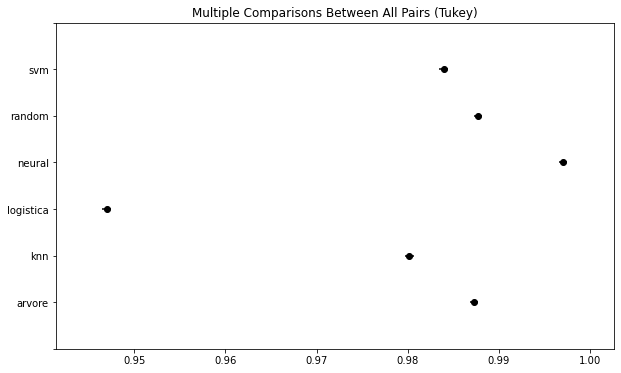

In [100]:
test.plot_simultaneous();

# Salvar o modelo treinado

In [ ]:
with open('/content/credit.pkl', 'rb') as f:
  x_credit_train, y_credit_train, x_credit_test, y_credit_test = pickle.load(f)

In [ ]:
x_credit = np.concatenate((x_credit_train, x_credit_test), axis=0)
y_credit = np.concatenate((y_credit_train, y_credit_test), axis=0)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [101]:
model_neural = MLPClassifier(activation='relu', batch_size=56, solver='adam')
model_neural.fit(x_credit, y_credit)

C:\Users\Ailton\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(batch_size=56)

In [102]:
model_decision = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
model_decision.fit(x_credit, y_credit)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [103]:
model_svm = SVC(C=2.0, kernel='rbf', probability=True)
model_svm.fit(x_credit, y_credit)

SVC(C=2.0, probability=True)

In [104]:
pickle.dump(model_neural, open('neural.sav', 'wb'))
pickle.dump(model_decision, open('decision.sav', 'wb'))
pickle.dump(model_svm, open('svm.sav', 'wb'))

# Carregar o modelo treinado

In [105]:
neural = pickle.load(open('neural.sav', 'rb'))
decision = pickle.load(open('decision.sav','rb'))
svm = pickle.load(open('svm.sav','rb'))

In [106]:
new = x_credit[1999]
new = new.reshape(1,-1)

In [107]:
neural.predict(new), decision.predict(new), svm.predict(new)

(array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64))

# Combinação de Classificadores 

* Classificação mais precisa
* Busca-se o melhor conjunto de classificadores
* Diminui o risco de selecionar um classificador individual inadequado

In [108]:
new = x_credit[1999]
new = new.reshape(1,-1)

In [109]:
resp_neural = neural.predict(new)
resp_decision = decision.predict(new)
resp_svm = svm.predict(new)

In [110]:
resp_neural, resp_decision, resp_svm

(array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64))

In [111]:
paga = 0
nao_paga = 0

if resp_neural[0] == 1:
  nao_paga += 1
else:
  paga += 1

if resp_decision[0] == 1:
   nao_paga += 1
else:
   paga += 1

if resp_svm[0] == 1:
  nao_paga += 1
else:
  paga += 1

if paga > nao_paga:
  print('Cliente pagará o emprestimo')
elif paga == nao_paga:
  print('Empate')
else:
  print('Cliente não pagará o emprestimo')

Cliente não pagará o emprestimo


# Rejeição de Classificadores

* Em aplicações reais:
* Apontar uma hipótese
* Rejeitar o resultado se não tiver certeza suficiente

In [112]:
new = x_credit[1999]
new = new.reshape(1,-1)

In [113]:
resp_neural = neural.predict(new)
resp_decision = decision.predict(new)
resp_svm = svm.predict(new)

In [114]:
resp_neural, resp_decision, resp_svm

(array([1], dtype=int64), array([1], dtype=int64), array([1], dtype=int64))

In [115]:
prob_neural = neural.predict_proba(new)
confianca_neural = prob_neural.max()
confianca_neural

0.9999131856179225

In [116]:
prob_decision = decision.predict_proba(new)
confianca_decision = prob_decision.max()
confianca_decision

1.0

In [117]:
prob_svm = svm.predict_proba(new)
confianca_svm = prob_svm.max()
confianca_svm

0.9930791317653231

melhorar o codigo se for uma aplicação que exige uma confiança alta

In [118]:
paga = 0
nao_paga = 0
confianca_minima = 0.999999
algoritmos = 0

if confianca_neural >= confianca_minima:
  algoritmos += 1
  if resp_neural[0] == 1:
   nao_paga += 1
  else:
   paga += 1

if confianca_decision >= confianca_minima:
  algoritmos += 1
  if resp_decision[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if confianca_svm >= confianca_minima:
  algoritmos += 1
  if resp_svm[0] == 1:
    nao_paga += 1
  else:
    paga += 1

if paga > nao_paga:
  print('Cliente pagará o emprestimo, baseado em {} algoritmos'.format(algoritmos))
elif paga == nao_paga:
  print('Empate, baseado em {} algoritmos'.format(algoritmos))
else:
  print('Cliente não pagará o emprestimo, baseado em {} algoritmos'.format(algoritmos))

Cliente não pagará o emprestimo, baseado em 1 algoritmos
